<a href="https://colab.research.google.com/github/SAHIL9581/LIVE-AI-CLASSES/blob/main/Deep_Learning_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

# Download and import the MIT Introduction to Deep Learning package
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.3/371.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00

In [ ]:
integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)

print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")

`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732


In [ ]:
fibonacci = torch.tensor([1, 1, 2, 3, 5, 8])
count_to_100 = torch.tensor(range(100))

print(f"`fibonacci` is a {fibonacci.ndim}-d Tensor with shape: {fibonacci.shape}")
print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}")

`fibonacci` is a 1-d Tensor with shape: torch.Size([6])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


In [ ]:

'''TODO: Define a 2-d Tensor'''
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)

assert isinstance(matrix, torch.Tensor), "matrix must be a torch Tensor object"
assert matrix.ndim == 2

'''TODO: Define a 4-d Tensor.'''
# Use torch.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = torch.zeros(10, 3, 256, 256)# todo part

assert isinstance(images, torch.Tensor), "images must be a torch Tensor object"
assert images.ndim == 4, "images must have 4 dimensions"
assert images.shape == (10, 3, 256, 256), "images is incorrect shape"
print(f"images is a {images.ndim}-d Tensor with shape: {images.shape}")


images is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])


In [ ]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"`row_vector`: {row_vector}")
print(f"`column_vector`: {column_vector}")
print(f"`scalar`: {scalar}")

`row_vector`: tensor([4., 5., 6.])
`column_vector`: tensor([2., 5.])
`scalar`: 2.0


In [ ]:
# Create the nodes in the graph and initialize values
a = torch.tensor(15)
b = torch.tensor(61)

# Add them!
c1 = torch.add(a, b)
c2 = a + b  # PyTorch overrides the "+" operation so that it is able to act on Tensors
print(f"c1: {c1}")
print(f"c2: {c2}")

c1: 76
c2: 76


In [ ]:
def func(a, b):
    '''TODO: Define the operation for c, d, e.'''
    c = a + b  # Addition
    d = a * b  # Multiplication
    e = c / (d + 1e-6)  # Avoid division by zero

    return e


In [ ]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a, b)
print(f"e_out: {e_out}")

e_out: 1.066666382222298


In [ ]:
import torch

# Define a custom dense layer
class OurDenseLayer(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(OurDenseLayer, self).__init__()
        # Define and initialize parameters: a weight matrix W and bias b
        # Note that the parameter initialization is random!
        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.bias = torch.nn.Parameter(torch.randn(num_outputs))

    def forward(self, x):
        '''TODO: define the operation for z (hint: use torch.matmul).'''
        z = torch.matmul(x, self.W) + self.bias  # Linear transformation

        '''TODO: define the operation for out (hint: use torch.sigmoid).'''
        y = torch.sigmoid(z)  # Apply sigmoid activation
        return y


In [ ]:
# Define a layer and test the output!
num_inputs = 2
num_outputs = 3
layer = OurDenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])
y = layer(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.2566, 0.8811, 0.5157]], grad_fn=<SigmoidBackward0>)


In [ ]:
### Defining a neural network using the PyTorch Sequential API ###

# define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# Define the model
'''TODO: Use the Sequential API to define a neural network with a
    single linear (dense!) layer, followed by non-linearity to compute z'''
model = nn.Sequential(nn.Linear(n_input_nodes, n_output_nodes),nn.Sigmoid())

In [ ]:
# Test the model with example input
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.2566, 0.8811, 0.5157]], grad_fn=<SigmoidBackward0>)


In [ ]:


class LinearWithSigmoidActivation(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearWithSigmoidActivation, self).__init__()
        '''TODO: define a model with a single Linear layer and sigmoid activation.'''
        self.linear = nn.Linear(num_inputs, num_outputs)  # Linear layer
        self.activation = nn.Sigmoid()  # Sigmoid activation function

    def forward(self, inputs):
        linear_output = self.linear(inputs)  # Apply linear transformation
        output = self.activation(linear_output)  # Apply sigmoid activation
        return output

# Example usage
model = LinearWithSigmoidActivation(2, 3)
print(model)  # To check the architecture


LinearWithSigmoidActivation(
  (linear): Linear(in_features=2, out_features=3, bias=True)
  (activation): Sigmoid()
)


In [ ]:
n_input_nodes = 2
n_output_nodes = 3
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = torch.tensor([[1, 2.]])
y = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.4578, 0.2782, 0.1527]], grad_fn=<SigmoidBackward0>)


In [ ]:

class LinearButSometimesIdentity(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearButSometimesIdentity, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    '''TODO: Implement the behavior where the network outputs the input, unchanged,
        under control of the isidentity argument.'''
    def forward(self, inputs, isidentity=False):
        ''' TODO '''
        if isidentity:
            return inputs  # Return input unchanged if isidentity is True
        else:
            return self.linear(inputs)  # Otherwise, apply the linear transformation



In [ ]:


# Define the model
model = LinearButSometimesIdentity(num_inputs=2, num_outputs=3)
x_input = torch.tensor([[1., 2.]])  # Ensure float dtype for compatibility

'''TODO: pass the input into the model and call with and without the input identity option.'''
out_with_linear = model(x_input, isidentity=False)  # Apply linear transformation
out_with_identity = model(x_input, isidentity=True)  # Return input unchanged

print(f"input: {x_input}")
print("Network linear output: {}; network identity output: {}".format(out_with_linear, out_with_identity))


input: tensor([[1., 2.]])
Network linear output: tensor([[ 0.7930, -0.3473, -0.8407]], grad_fn=<AddmmBackward0>); network identity output: tensor([[1., 2.]])


In [ ]:
### Gradient computation ###

# y = x^2
# Example: x = 3.0
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()  # Compute the gradient

dy_dx = x.grad
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)
assert dy_dx == 6.0

dy_dx of y=x^2 at x=3.0 is:  tensor(6.)


Initializing x=-0.2820470333099365


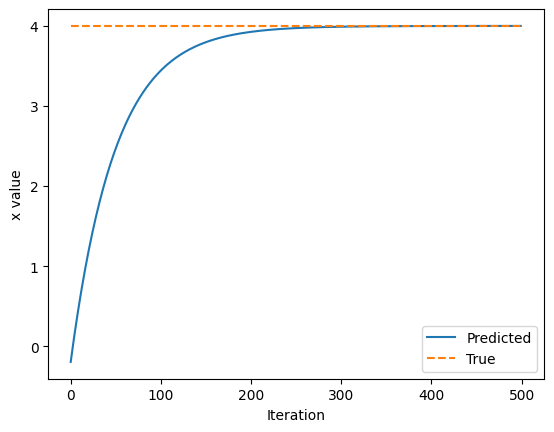

In [ ]:
import torch
import matplotlib.pyplot as plt

# Initialize a random value for our initial x
x = torch.randn(1)
print(f"Initializing x={x.item()}")

learning_rate = 1e-2  # Learning rate
history = []
x_f = 4  # Target value

# We will run gradient descent for a number of iterations
for i in range(500):
    x = torch.tensor([x], requires_grad=True)  # Ensure x has gradients enabled

    # TODO: Compute the loss as the square of the difference between x and x_f
    loss = (x - x_f) ** 2  # Mean Squared Error (MSE) style loss

    # Backpropagate through the loss to compute gradients
    loss.backward()

    # Update x with gradient descent
    x = x.item() - learning_rate * x.grad.item()

    history.append(x)  # Store x's value at each iteration

# Plot the evolution of x as we optimize toward x_f!
plt.plot(history)
plt.plot([0, 500], [x_f, x_f], linestyle="dashed")  # True value line
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()
